<a href="https://colab.research.google.com/github/TriptSharma/What-s-Cooking/blob/master/whats_cooking_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install eli5

     |████████████████████████████████| 102kB 3.2MB/s 


In [0]:
import numpy as np
import pandas as pd
import eli5
import nltk

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
#from sklearn.neighbors import KNeighborsClassifier  
#from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier


In [0]:
#Import data
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [0]:
df = pd.read_json('train.json')
df.head()
df['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [0]:
df.ingredients = df.ingredients.astype('str')
# testset.ingredients = testset.ingredients.astype('str')

df.ingredients = df.ingredients.str.replace("["," ")
df.ingredients = df.ingredients.str.replace("]"," ")
df.ingredients = df.ingredients.str.replace("'"," ")
df.ingredients = df.ingredients.str.replace(","," ")

In [0]:
nltk.download(['punkt', 'wordnet'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
df.ingredients = df.ingredients.str.lower()
# testset.ingredients = testset.ingredients.str.lower()

In [0]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

df.ingredients = df.ingredients.apply(lambda x: word_tokenize(x))
# testset.ingredients = testset.ingredients.apply(lambda x: word_tokenize(x))

# print(df.ingredients)

In [0]:
import re
lemmatizer = WordNetLemmatizer()
def preprocess(ingredients):
    ingredients_text = ' '.join(ingredients)
    ingredients_text = ingredients_text.lower()
    ingredients_text = ingredients_text.replace('-', ' ')
    words = []
    for word in ingredients_text.split():
        if re.findall('[0-9]', word): continue
        if len(word) <= 2: continue
        if '’' in word: continue
        word = lemmatizer.lemmatize(word)
        if len(word) > 0: words.append(word)
    return ' '.join(words)

In [0]:
df.ingredients = df.ingredients.apply(preprocess)
# testset.ingredients = testset.ingredients.apply(preprocess)

print(df.ingredients[0])

romaine lettuce black olive grape tomato garlic pepper purple onion seasoning garbanzo bean feta cheese crumbles


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

vect = TfidfVectorizer()
features = vect.fit_transform(df.ingredients)
print(features)
# features = csc_matrix.toarray(features)

from sklearn import preprocessing
scaler = preprocessing.StandardScaler(with_mean=False)
features_scaled = scaler.fit_transform(features)

# features_scaled = csr_matrix.toarray(features_scaled)

# print(features_scaled)

  (0, 666)	0.34827614404150986
  (0, 471)	0.15176502988889437
  (0, 861)	0.3167276767158082
  (0, 160)	0.20790510180038077
  (0, 979)	0.4043455766076157
  (0, 2193)	0.2396832355219728
  (0, 1712)	0.1118145095283498
  (0, 1987)	0.24911439037394897
  (0, 1824)	0.10391647275486823
  (0, 984)	0.10970675831861157
  (0, 2527)	0.14805335445131518
  (0, 1058)	0.3560443893695225
  (0, 1709)	0.13948352921322324
  (0, 217)	0.1457359419289999
  (0, 1389)	0.2774555999091271
  (0, 2093)	0.35697121618985855
  (1, 1702)	0.11720591728537258
  (1, 2626)	0.21077828519472916
  (1, 1560)	0.21259150922292158
  (1, 1521)	0.40418195294133674
  (1, 610)	0.22143612238501945
  (1, 2722)	0.2787031729197329
  (1, 1078)	0.1861914705516716
  (1, 801)	0.18472221213300716
  (1, 2510)	0.2735976752591605
  :	:
  (39772, 801)	0.08986305908130246
  (39772, 2145)	0.05299036905810943
  (39772, 910)	0.08970244287660747
  (39772, 984)	0.062137502155982426
  (39773, 440)	0.2605950026595458
  (39773, 2091)	0.40651429940253025
 

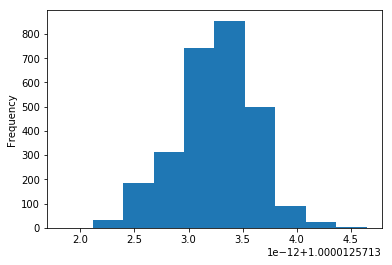

In [0]:
import matplotlib.pyplot as plt

features_scaled_df = pd.DataFrame(csr_matrix.toarray(features_scaled))
# print(features_scaled_df)
features_scaled_df[features_scaled_df.columns].std().plot('hist')

In [0]:
features_df = pd.DataFrame(csr_matrix.toarray(features))

features_df[features_df.columns].std().plot('hist')
# plt.title('Distribution of stds of all columns')


KeyboardInterrupt: ignored

In [0]:
encoder = LabelEncoder()
encoder.fit(df.cuisine.unique())
labels = encoder.transform(df.cuisine)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [0]:
logreg = LogisticRegression(C=10,solver='lbfgs', multi_class='multinomial',max_iter=1000, random_state=9)
logreg.fit(X_train,y_train)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=9, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print("Logistic Regression accuracy",logreg.score(X_test, y_test))

Logistic Regression accuracy 0.7808925204274042


In [0]:
eli5.show_weights(logreg, top=50)

In [0]:
weights = eli5.explain_weights_df(logreg, top=50)
print(weights)

     target feature     weight
0         0    x347  11.382584
1         0   x1469   7.689333
2         0   x2467   7.152879
3         0    x116   7.103012
4         0    x574   6.627969
5         0   x2391   6.028037
6         0   x1397   5.823450
7         0    x728   5.768959
8         0    x534   5.584601
9         0    x561   5.454106
10        0   x1715   4.832072
11        0    x160   4.772884
12        0   x2359   4.719720
13        0    x590   4.640905
14        0   x1887   4.637466
15        0    x157   4.503906
16        0   x1366   4.343856
17        0    x480   4.318570
18        0   x2527   4.148585
19        0    x509   4.119803
20        0   x1709   4.110615
21        0   x1521   4.009178
22        0   x1560   4.005825
23        0   x1480   3.969097
24        0     x29   3.951199
25        0   x2658   3.922093
26        0    x471   3.915426
27        0    x112   3.850894
28        0   x1054   3.844653
29        0   x1780   3.815289
..      ...     ...        ...
970     

In [0]:
word2id = vect.vocabulary_
#print(wordid)
id2word={}

for word, id in word2id.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
  id2word['x'+str(id)]=word
print(id2word)

def func1(getid):
  for word, id in word2id.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
      if id == getid:
          return word
          
func1(2329)

{'x2093': 'romaine', 'x1389': 'lettuce', 'x217': 'black', 'x1709': 'olive', 'x1058': 'grape', 'x2527': 'tomato', 'x984': 'garlic', 'x1824': 'pepper', 'x1987': 'purple', 'x1712': 'onion', 'x2193': 'seasoning', 'x979': 'garbanzo', 'x160': 'bean', 'x861': 'feta', 'x471': 'cheese', 'x666': 'crumbles', 'x1896': 'plain', 'x910': 'flour', 'x1090': 'ground', 'x2145': 'salt', 'x2510': 'thyme', 'x801': 'egg', 'x1078': 'green', 'x2722': 'yellow', 'x610': 'corn', 'x1521': 'meal', 'x1560': 'milk', 'x2626': 'vegetable', 'x1702': 'oil', 'x1515': 'mayonaise', 'x604': 'cooking', 'x494': 'chilies', 'x1084': 'grilled', 'x483': 'chicken', 'x291': 'breast', 'x1943': 'powder', 'x2326': 'soy', 'x2167': 'sauce', 'x332': 'butter', 'x1413': 'liver', 'x2667': 'water', 'x2677': 'wheat', 'x2216': 'shallot', 'x615': 'cornflour', 'x438': 'cayenne', 'x1793': 'paste', 'x1382': 'lemon', 'x1259': 'juice', 'x493': 'chili', 'x1789': 'passata', 'x687': 'cumin', 'x250': 'boneless', 'x2276': 'skinless', 'x2504': 'thigh', 'x9

'soymilk'

In [0]:
cu = df.cuisine.unique()
c_id = dict(zip(encoder.transform(cu), cu))

# for cid, cuisine in x:
#   print(cid, cuisine)
  
print(c_id)

{6: 'greek', 16: 'southern_us', 4: 'filipino', 7: 'indian', 10: 'jamaican', 17: 'spanish', 9: 'italian', 13: 'mexican', 3: 'chinese', 1: 'british', 18: 'thai', 19: 'vietnamese', 2: 'cajun_creole', 0: 'brazilian', 5: 'french', 11: 'japanese', 8: 'irish', 12: 'korean', 14: 'moroccan', 15: 'russian'}


In [0]:
# weights['feature'].str.split('x', expand=True)
# print(weights)

weights = weights.replace({'target':c_id})
weights = weights.replace({'feature':id2word})

In [0]:
weights.to_csv('weights-rep.csv')

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1, verbose=1)
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.4min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [0]:


# eli5.show_weights(rf, top=50)

Weight,Feature
0.0162 ± 0.0259,x2541
0.0144 ± 0.0128,x1709
0.0137 ± 0.0189,x2326
0.0136 ± 0.0160,x471
0.0130 ± 0.0026,x2145
0.0127 ± 0.0039,x1702
0.0124 ± 0.0106,x2167
0.0118 ± 0.0139,x534
0.0118 ± 0.0124,x1007
0.0114 ± 0.0049,x2419


In [0]:
weights2 = eli5.explain_weights_df(rf, top=50)
print(weights2)

   feature    weight       std
0    x2541  0.016235  0.012934
1    x1709  0.014401  0.006404
2    x2326  0.013658  0.009463
3     x471  0.013590  0.007976
4    x2145  0.013041  0.001300
5    x1702  0.012721  0.001960
6    x2167  0.012440  0.005294
7     x534  0.011838  0.006935
8    x1007  0.011794  0.006223
9    x2419  0.011445  0.002429
10    x687  0.011337  0.006934
11   x1824  0.011178  0.001214
12   x1780  0.010932  0.009708
13   x1397  0.010931  0.005779
14   x1712  0.010756  0.001724
15    x984  0.010591  0.001618
16    x332  0.009471  0.002209
17   x2212  0.008986  0.006717
18   x1090  0.008509  0.001313
19    x801  0.008285  0.001201
20    x940  0.008112  0.001294
21   x2667  0.008070  0.000893
22   x2527  0.007912  0.002516
23    x610  0.007643  0.003145
24   x1560  0.007520  0.001312
25   x2061  0.007412  0.002297
26    x151  0.007375  0.005036
27    x910  0.007220  0.001097
28   x2143  0.007063  0.006874
29   x1943  0.007040  0.001583
30    x888  0.006820  0.003670
31   x10

In [0]:
weights2 = weights2.replace({'target':c_id})
weights2 = weights2.replace({'feature':id2word})

In [0]:
weights2.to_csv('weights-rf-rep.csv')

In [0]:
from sklearn.svm import LinearSVC
linearsvm = LinearSVC(C=1.0,random_state=0,multi_class='crammer_singer',dual = False, max_iter = 1500)
linearsvm.fit(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1500,
          multi_class='crammer_singer', penalty='l2', random_state=0,
          tol=0.0001, verbose=0)

In [0]:
print("Linear SVM accuracy", linearsvm.score(X_test, y_test))

Linear SVM accuracy 0.7822752985543683


In [0]:
weights3 = eli5.explain_weights_df(linearsvm, top=50)
# print(weights3)
weights3 = weights3.replace({'target':c_id})
weights3 = weights3.replace({'feature':id2word})

In [0]:
weights3.to_csv('weights-linsvm-rep.csv')

In [0]:
import itertools
from matplotlib import pyplot as plt
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
     
    '''
This function is modified to show the color range as normalized to f1 score
both f1 score and class count are printed in the squares
    '''
    
    if normalize:
        cm_normal = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(20, 20))
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.imshow(cm_normal, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #using the raw cm so the counts are printed on the heat map
    normalize = False
    
#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
    thresh = cm_normal.max() / 2.

    for i, j in itertools.product(range(cm_normal.shape[0]), range(cm_normal.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_normal[i, j] > thresh else "black")
        plt.text(j, i+0.25, format(cm_normal[i, j], '.2f'),
         horizontalalignment="center",
         color="white" if cm_normal[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [0]:
y_predict = logreg.predict(X_test) 
y_predict_train = logreg.predict(X_train)

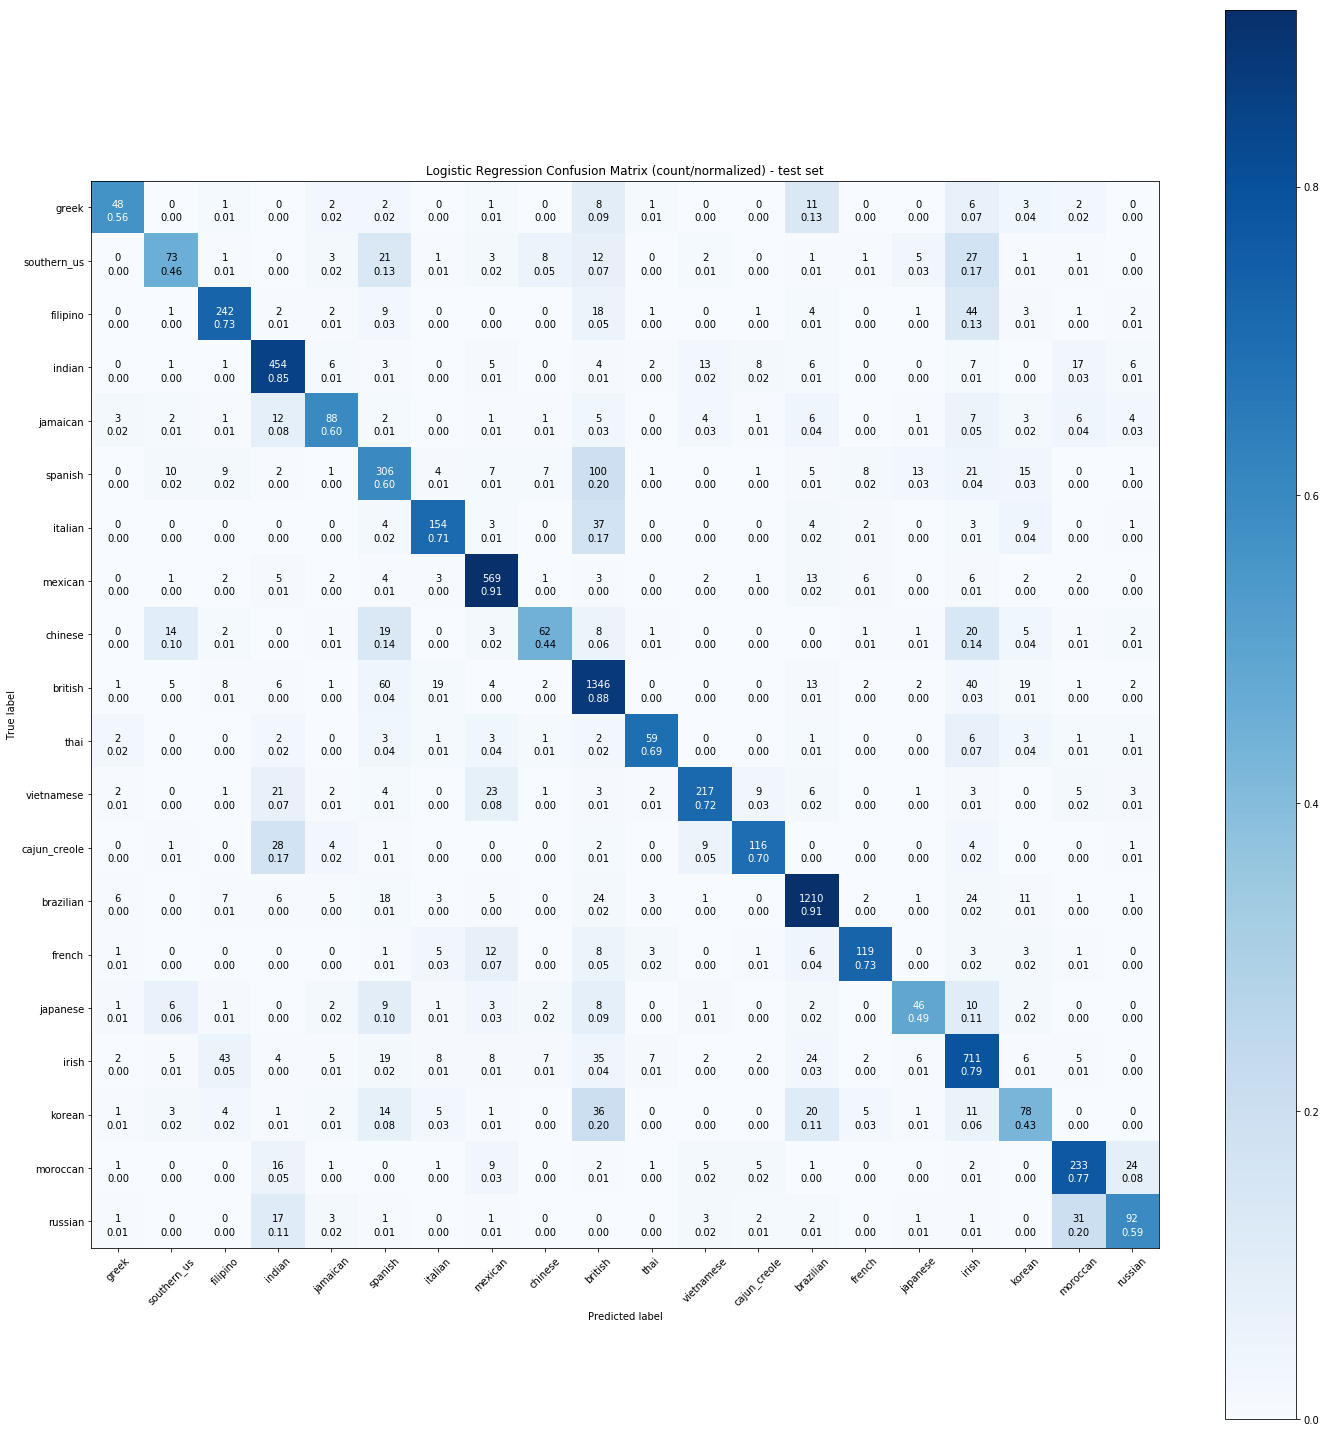

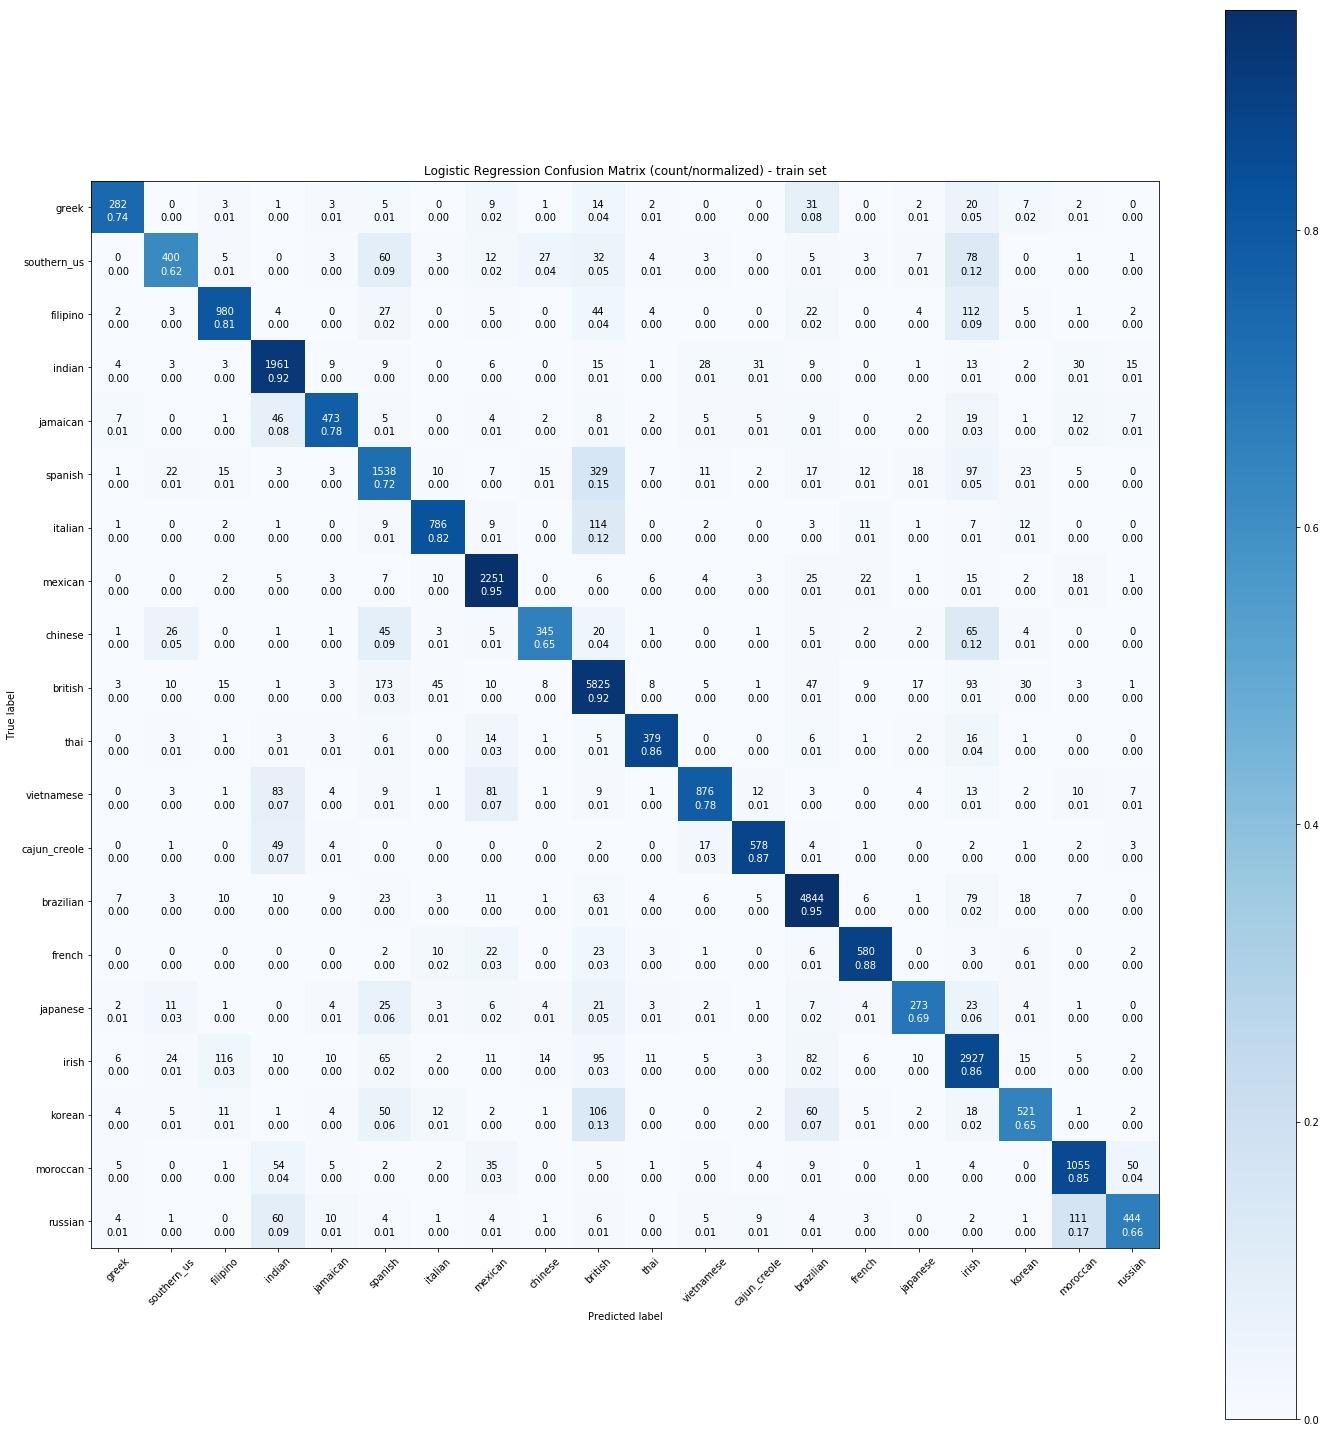

In [0]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from matplotlib import pyplot as plt

cm_lr_train = confusion_matrix(y_train, y_predict_train)
cm_lr_test = confusion_matrix(y_test, y_predict)

plot_confusion_matrix(cm_lr_test, classes=df.cuisine.unique(), normalize=True, title="Logistic Regression Confusion Matrix (count/normalized) - test set")
plot_confusion_matrix(cm_lr_train, classes=df.cuisine.unique(), normalize=True, title="Logistic Regression Confusion Matrix (count/normalized) - train set")


In [0]:
#metrics for rf
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.45      0.59        85
           1       0.65      0.23      0.34       160
           2       0.81      0.66      0.72       331
           3       0.72      0.89      0.80       533
           4       0.79      0.44      0.57       147
           5       0.60      0.52      0.56       511
           6       0.86      0.55      0.67       217
           7       0.82      0.92      0.87       622
           8       0.87      0.34      0.48       140
           9       0.69      0.92      0.79      1531
          10       0.96      0.51      0.66        85
          11       0.88      0.64      0.74       303
          12       0.94      0.60      0.73       166
          13       0.84      0.92      0.88      1328
          14       0.91      0.60      0.72       163
          15       0.90      0.30      0.45        94
          16       0.66      0.77      0.71       901
          17       0.72    

In [0]:
#metrics for linsvm only
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.56      0.62        85
           1       0.60      0.46      0.52       160
           2       0.75      0.73      0.74       331
           3       0.79      0.85      0.82       533
           4       0.68      0.60      0.64       147
           5       0.61      0.60      0.61       511
           6       0.75      0.71      0.73       217
           7       0.86      0.91      0.89       622
           8       0.67      0.44      0.53       140
           9       0.81      0.88      0.84      1531
          10       0.73      0.69      0.71        85
          11       0.84      0.72      0.77       303
          12       0.79      0.70      0.74       166
          13       0.91      0.91      0.91      1328
          14       0.80      0.73      0.77       163
          15       0.58      0.49      0.53        94
          16       0.74      0.79      0.77       901
          17       0.48    

In [0]:
#metrics for logreg
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.51      0.57        85
           1       0.55      0.51      0.53       160
           2       0.78      0.71      0.74       331
           3       0.80      0.84      0.82       533
           4       0.67      0.59      0.63       147
           5       0.60      0.65      0.63       511
           6       0.77      0.67      0.72       217
           7       0.87      0.89      0.88       622
           8       0.63      0.45      0.53       140
           9       0.82      0.88      0.85      1531
          10       0.76      0.65      0.70        85
          11       0.82      0.71      0.76       303
          12       0.84      0.72      0.77       166
          13       0.91      0.91      0.91      1328
          14       0.86      0.73      0.79       163
          15       0.61      0.48      0.54        94
          16       0.72      0.79      0.75       901
          17       0.49    